In [1]:
import pandas as pd
import numpy as np
import requests
from IPython.display import HTML, display
from bs4 import BeautifulSoup
from bs4 import Comment
import json
import html
import re
import urllib.parse
from threading import Thread
from html import unescape
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.decomposition import LatentDirichletAllocation as LDA
from sklearn.decomposition import NMF
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from nltk.tokenize import sent_tokenize, word_tokenize

import plotly
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [24]:
talks = pd.read_pickle('../datasets/videosData.pkl')
talks['views'] = talks.views.astype(int)
talks['likes'] = talks.likes.astype(int)
talks['dislikes'] = talks.dislikes.astype(int)
print(len(talks))
talks.loc[:, 'laughterCount'] = talks.text.apply(lambda text: len(re.findall(r'(laughter|clap|applause)', text.lower())))
talks.head(2)

31583


,title,speaker,event,videoId,titleRaw,publishedTimeRaw,likes,dislikes,lengthSeconds,keywords,views,talkText,videoDescription,currentDate,text,laughterCount
-eLgCDFKD7s,The Art of living with Leopards,Nikit Surve,TEDxVileParle,-eLgCDFKD7s,The Art of living with Leopards | Nikit Surve ...,1 week ago,10,0,1006,"[TEDxTalks, English, Global Issues, Animals]",544,"<?xml version=""1.0"" encoding=""utf-8"" ?><transc...",Nikit talks about wildlife and his work within...,1.57697e+09,I don't have never was in Mumbai so muchall of...,1
DF4ipJE_t_A,Paisajes invisibles,Francisco García & Manuel Bugallo,TEDxGalicia,DF4ipJE_t_A,Paisajes invisibles | Francisco García & Manue...,1 week ago,21,0,723,"[TEDxTalks, Spanish, Global Issues, Environment]",761,"<?xml version=""1.0"" encoding=""utf-8"" ?><transc...",Fran y Manuel nos ofrecen una mirada diferente...,1.57699e+09,I always loved the Mediterranean maybe because...,2


In [36]:
talks.sort_values('views', ascending=False)

,title,speaker,event,videoId,titleRaw,publishedTimeRaw,likes,dislikes,lengthSeconds,keywords,views,talkText,videoDescription,currentDate,text,laughterCount
GNZBSZD16cY,Beatbox brilliance,Tom Thum,TEDxSydney,GNZBSZD16cY,Beatbox brilliance | Tom Thum | TEDxSydney,5 years ago,950575,17648,699,"[ted talks, ted x, tedx talk, English, Beatbox...",71766241,"<?xml version=""1.0"" encoding=""utf-8"" ?><transc...",Never miss a talk! SUBSCRIBE to the TEDx chann...,1.57699e+09,"My name is Tom and I'm here today, to explain...",0
36m1o-tM05g,My philosophy for a happy life,Sam Berns,TEDxMidAtlantic,36m1o-tM05g,My philosophy for a happy life | Sam Berns | T...,5 years ago,632529,13170,765,"[tedx talk, health, United States, ted, tedxmi...",36256280,"<?xml version=""1.0"" encoding=""utf-8"" ?><transc...",Never miss a talk! SUBSCRIBE to the TEDx chann...,1.57699e+09,Translator: Visar Hadri Reviewer: Helena Bedal...,8
7TXEZ4tP06c,Why people believe they can’t draw - and how t...,Graham Shaw,TEDxHull,7TXEZ4tP06c,Why people believe they can’t draw - and how t...,4 years ago,520839,18018,903,"[ted talks, tedx talk, Education, Self improve...",27235925,"<?xml version=""1.0"" encoding=""utf-8"" ?><transc...",Why is it that so many people think they can’t...,1.57699e+09,Translator: Mohiedden Albendqji Auditor: Samar...,15
LNHBMFCzznE,"After watching this, your brain will not be th...",Lara Boyd,TEDxVancouver,LNHBMFCzznE,"After watching this, your brain will not be th...",3 years ago,231477,14130,864,"[TEDxTalks, English, Canada, Science (hard), B...",25245142,"<?xml version=""1.0"" encoding=""utf-8"" ?><transc...","In a classic research-based TEDx Talk, Dr. Lar...",1.57699e+09,Translator: Eatedal Saii Auditor: Anwar Dafa-A...,2
Lp7E973zozc,How to stop screwing yourself over,Mel Robbins,TEDxSF,Lp7E973zozc,How to stop screwing yourself over | Mel Robbi...,7 years ago,334461,13184,1300,"[ted talks, ted talk, TEDxSF, TEDx San Francis...",22246653,"<?xml version=""1.0"" encoding=""utf-8"" ?><transc...",Never miss a talk! SUBSCRIBE to the TEDx chann...,1.57697e+09,Translator: Zeineb Trabelsi Auditor: Hussain L...,17
hqKafI7Amd8,Top hacker shows us how it's done,Pablos Holman,TEDxMidwest,hqKafI7Amd8,Top hacker shows us how it's done | Pablos Hol...,6 years ago,211804,8591,1070,"[secure technology systems, English, US, tedx ...",21365801,"<?xml version=""1.0"" encoding=""utf-8"" ?><transc...",Never miss a talk! SUBSCRIBE to the TEDx chann...,1.57699e+09,Translated by: Rik Delaet Checked by: Christel...,30
LVgzOyHVcj4,"No Sex Marriage – Masturbation, Loneliness, Ch...",Maureen McGrath,TEDxStanleyPark,LVgzOyHVcj4,"No Sex Marriage – Masturbation, Loneliness, Ch...",2 years ago,117180,16357,1312,"[TEDxTalks, English, Canada, Life, Aging, Beha...",20050462,"<?xml version=""1.0"" encoding=""utf-8"" ?><transc...",Love? Marriage? Sex? Can a married couple have...,1.57697e+09,Translator: Ahmad AbdElrahman Auditor: Riyad A...,38
e4PTvXtz4GM,Faster than a calculator,Arthur Benjamin,TEDxOxford,e4PTvXtz4GM,Faster than a calculator | Arthur Benjamin | T...,6 years ago,341203,8829,904,"[English, TEDxOxford, tedx talk, ted talk, UK,...",19808955,"<?xml version=""1.0"" encoding=""utf-8"" ?><transc...",Never miss a talk! SUBSCRIBE to the TEDx chann...,1.57699e+09,Translator: Taim Noaman Auditor: Hani Eldalees...,20
e4PTvXtz4GM,Faster than a calculator,Arthur Benjamin,TEDxOxford,e4PTvXtz4GM,Faster than a calculator | Arthur Benjamin | T...,6 years ago,341203,8829,904,"[English, TEDxOxford, tedx talk, ted talk, UK,...",19808955,"<?xml version=""1.0"" encoding=""utf-8"" ?><transc...",Never miss a talk! SUBSCRIBE to the TEDx chann...,1.57699e+09,Translator: Taim Noaman Auditor: Hani Eldalees...,20
gRJ_QfP2mhU,Why I stopped watching porn,Ran Gavrieli,TEDxJaffa,gRJ_QfP2mhU,Why I stopped watching porn | Ran Gavrieli | T...,5 years ago,231405,20213,958,"[Education (Word), tedx talk, tedx talks, tedx...",19582869,"<?xml version=""1.0"" encoding=""utf-8"" ?><transc...",Never miss a tal

In [35]:
talks.views.dtype

dtype('int32')

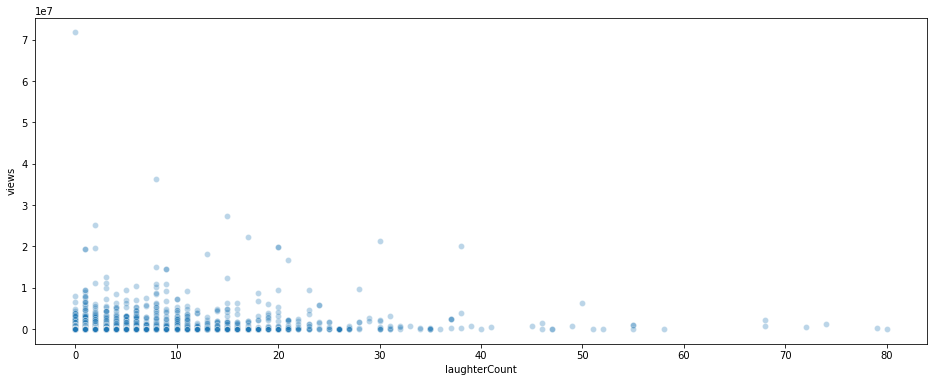

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 6))
sns.scatterplot(
    x='laughterCount',
    y='views',
    data=talks,
    alpha = 0.3
#     figsize=(20,10)
)